<a href="https://colab.research.google.com/github/franconoronha/treinamento-h2ia/blob/main/Busca_Tabu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Busca Tabu

## Problema da Mochila
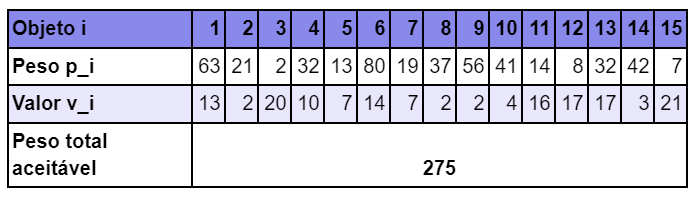

In [2]:
import numpy as np

rng = np.random.default_rng()
pesos = np.array([63,21,2,32,13,80,19,37,56,41,14,8,32,42,7])
valores = np.array([13,2,20,10,7,14,7,2,2,4,16,17,17,3,21])

class Mochila:
  def __init__(self, objetos):
    self.objetos = objetos
    self.peso = np.sum(pesos * objetos)
    self.valor = np.sum(valores * objetos)

In [8]:
objetos = rng.integers(2, size=15) # Preenche a mochila com itens aleatórios
mochila = Mochila(objetos)
while mochila.peso > 275:
  mochila = Mochila(rng.integers(2, size=15)) # Caso gere uma mochila acima do limite

print(f"Mochila gerada: {mochila.objetos}")
print(f"Peso: {mochila.peso}")
print(f"Valor: {mochila.valor}")

Mochila gerada: [0 0 1 0 1 1 0 0 0 1 1 0 0 1 1]
Peso: 199
Valor: 85


In [50]:
max_iteracoes = 1000
turnos_proibidos = 10
lista_tabu = []

def verifica_lista_tabu(estado):
  for x in lista_tabu:
    if np.array_equal(x[0], estado):
      return True
  return False

def gera_prox_estado(mochila):
  vizinhos = []
  valores_vizinhos = []
  for pos_1, x_1 in np.ndenumerate(mochila.objetos):
    if x_1 == 0:
      # tenta adicionar esse item
      novo_estado = np.copy(mochila.objetos)
      novo_estado[pos_1] = 1
      nova_mochila = Mochila(novo_estado)
      if nova_mochila.peso <= 275:
        if not verifica_lista_tabu(novo_estado):
          vizinhos.append(nova_mochila)
          valores_vizinhos.append(nova_mochila.valor)
      #else:
      for pos_2, x_2 in np.ndenumerate(mochila.objetos):
        # tenta trocar com os itens que estão na mochila
        if x_2 == 1:
          novo_estado = np.copy(mochila.objetos)
          novo_estado[pos_2] = 0
          novo_estado[pos_1] = 1
          nova_mochila = Mochila(novo_estado)
          if nova_mochila.peso <= 275:
            if not verifica_lista_tabu(novo_estado):
              vizinhos.append(nova_mochila)
              valores_vizinhos.append(nova_mochila.valor)
              
  melhor = vizinhos[np.argmax(valores_vizinhos)]
  return melhor

def busca_tabu(mochila):
  melhor_estado = mochila
  estado_atual = mochila
  for x in range(0, max_iteracoes):
    
    for p in lista_tabu:
      p[1] -= 1
      if p[1] == 0:
        lista_tabu.remove(p)

    estado_atual = gera_prox_estado(estado_atual)


    lista_tabu.append([estado_atual.objetos, turnos_proibidos])
    if(estado_atual.valor > melhor_estado.valor):
      melhor_estado = estado_atual

  return melhor_estado

In [52]:
resultado = busca_tabu(mochila)
print(resultado.objetos)
print(resultado.peso)
print(resultado.valor)

[1 0 1 1 1 1 1 0 0 0 1 1 1 0 1]
270
142
